In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numpy as np

TESTING

,geometry
0,"POLYGON ((-77.07695 38.92945, -77.07686 38.929..."
1,"POLYGON ((-77.07839 38.93672, -77.07839 38.936..."
2,"POLYGON ((-77.07602 38.94230, -77.07613 38.942..."
3,"POLYGON ((-77.07870 38.94405, -77.07870 38.943..."
4,"POLYGON ((-77.07542 38.92373, -77.07543 38.923..."


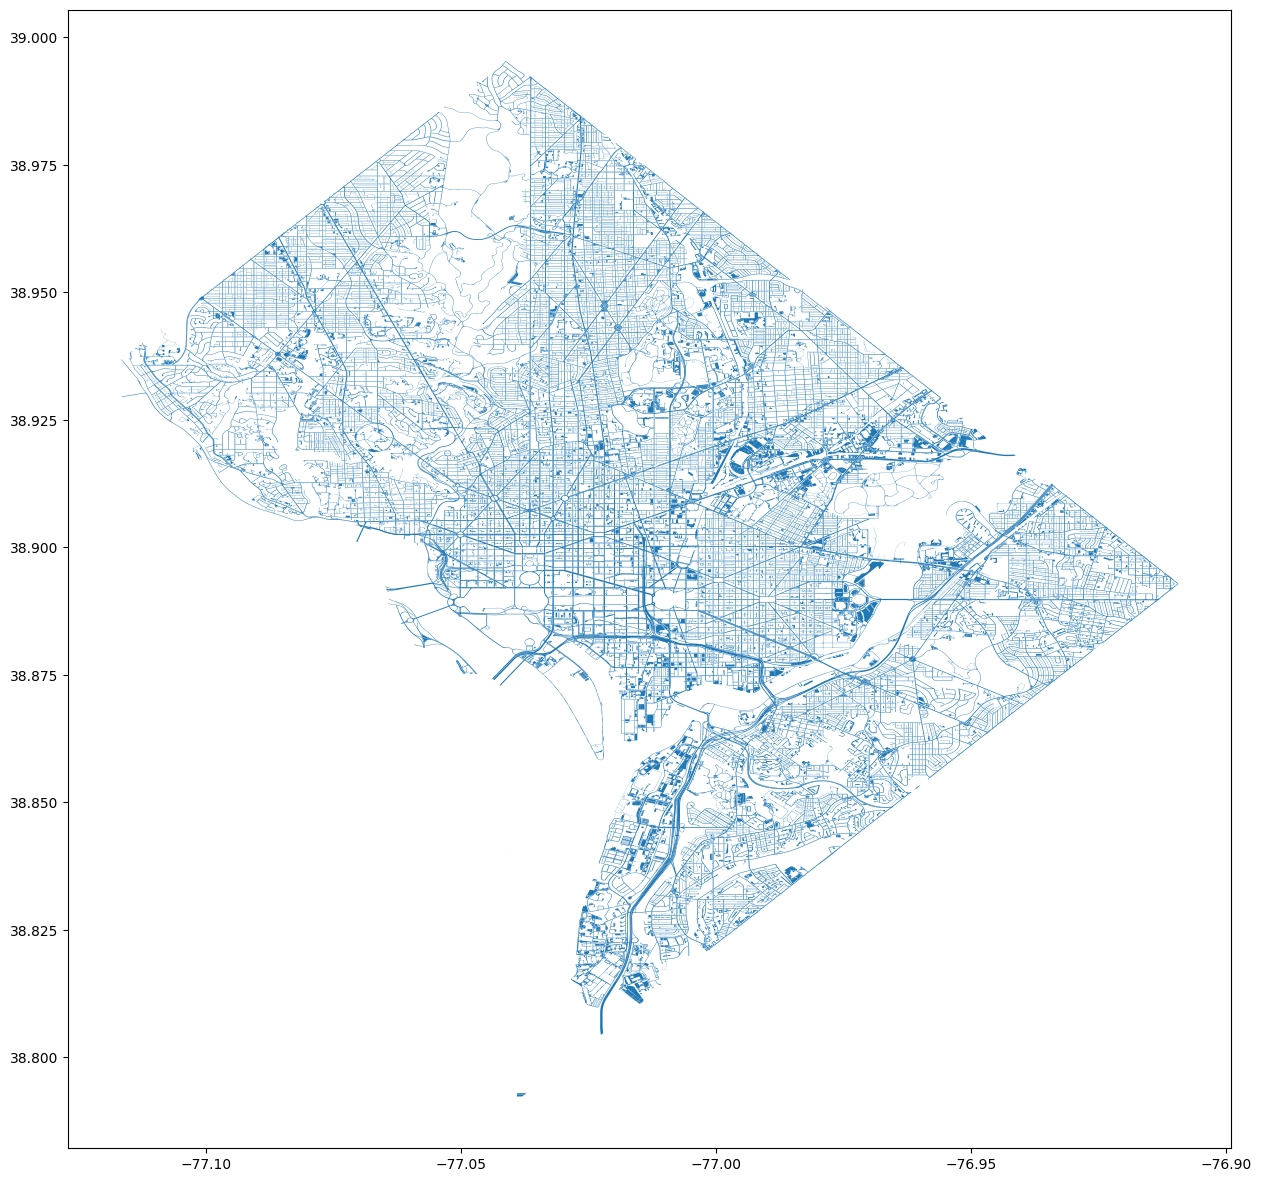

In [4]:
street_map = gpd.read_file('data/Roads.shp')
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)
street_map.head()

In [5]:
df = pd.read_csv('data/WashingtonDC_Final_2022-06-18.csv')
crs = {'init':'epsg:4326'}

# keep only common_name, condition, latitude_coordinate, longitude_coordinate, and native columns
df = df[['common_name', 'condition', 'latitude_coordinate', 'longitude_coordinate', 'native']]
# convert condition to numerical
df['condition'] = df['condition'].replace({'excellent': 4, 'good': 3, 'fair': 2, 'poor': 1, 'dead/dying': 0, 'dead': 0})
# one hot "common_name" column
df = pd.get_dummies(df, columns=["common_name"])
# one hot native column
df = pd.get_dummies(df, columns=["native"])
# drop native_no_info column
df.drop(columns=['native_no_info'], inplace=True)
# drop rows where condition is null
df = df.dropna(subset=['condition'])
df.head()

,condition,latitude_coordinate,longitude_coordinate,common_name_(see notes),common_name_Abrovitae,common_name_Alleghany serviceberry,common_name_American beech,common_name_American elm,common_name_American holly,common_name_American hop hornbeam,...,common_name_White oak,common_name_White pine,common_name_Whitehouse callery pear,common_name_Willow,common_name_Willow oak,common_name_Yellow buckeye,common_name_Yellowwood,common_name_Yoshino cherry,native_introduced,native_naturally_occurring
0,3,38.932752,-77.046384,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,38.932803,-77.046243,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,38.885574,-76.997896,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,38.932376,-77.045471,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,38.929388,-77.038800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
X = df.drop('condition', axis=1)
y = df['condition']

In [7]:
geometry = [Point(xy) for xy in zip(df['longitude_coordinate'], df['latitude_coordinate'])]
geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/Users/alexisfrankson/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,condition,latitude_coordinate,longitude_coordinate,common_name_(see notes),common_name_Abrovitae,common_name_Alleghany serviceberry,common_name_American beech,common_name_American elm,common_name_American holly,common_name_American hop hornbeam,...,common_name_White pine,common_name_Whitehouse callery pear,common_name_Willow,common_name_Willow oak,common_name_Yellow buckeye,common_name_Yellowwood,common_name_Yoshino cherry,native_introduced,native_naturally_occurring,geometry
0,3,38.932752,-77.046384,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,POINT (-77.04638 38.93275)
1,3,38.932803,-77.046243,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,POINT (-77.04624 38.93280)
2,3,38.885574,-76.997896,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,POINT (-76.99790 38.88557)
3,3,38.932376,-77.045471,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,POINT (-77.04547 38.93238)
4,2,38.929388,-77.038800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,POINT (-77.03880 38.92939)


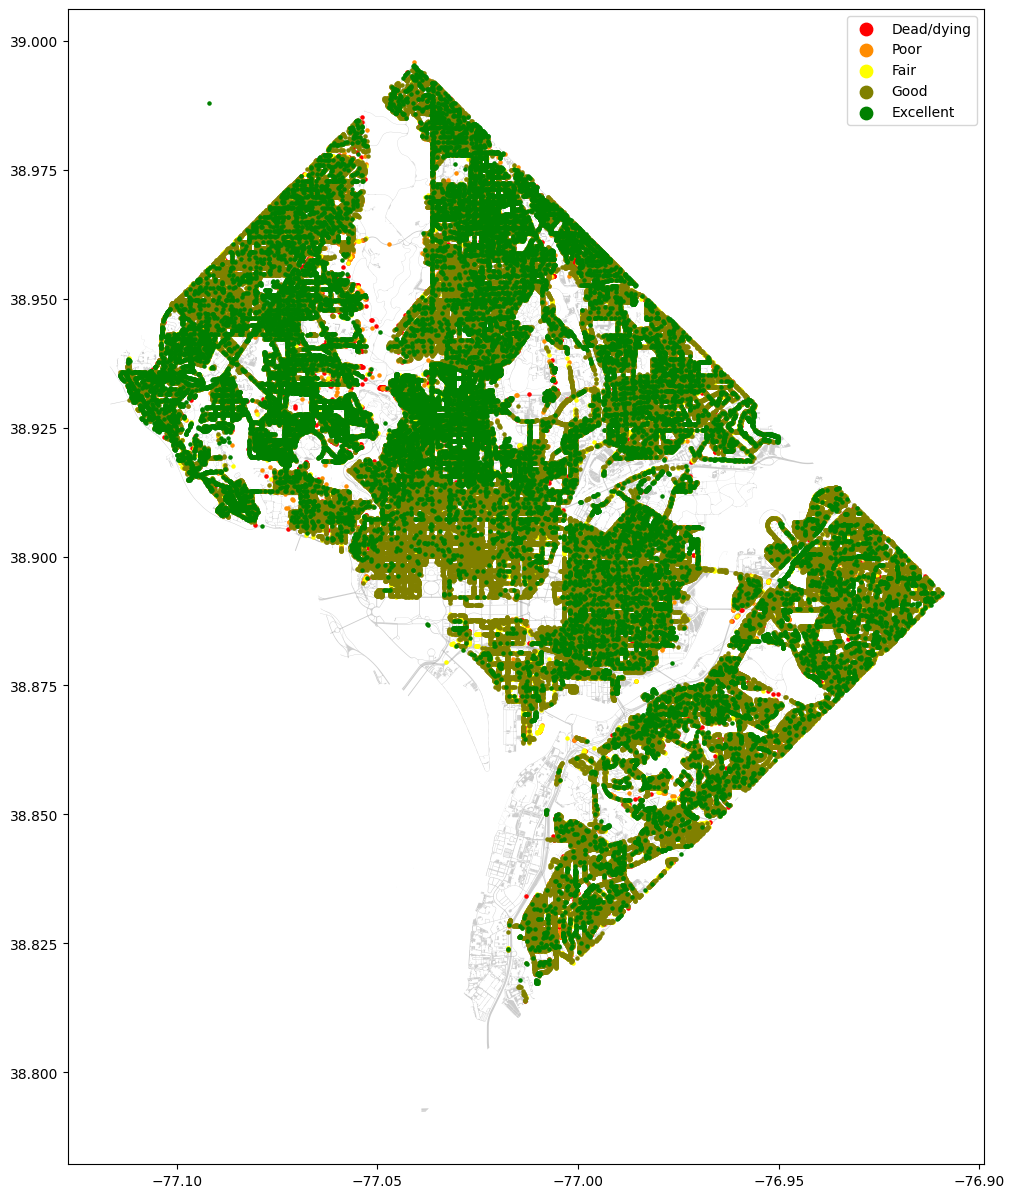

In [9]:
msize = 5
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['condition'] == 0].plot(ax=ax, 
                                       markersize=msize, 
                                       color='red', 
                                    #    marker='o', 
                                       label='Dead/dying')
geo_df[geo_df['condition'] == 1].plot(ax=ax, 
                                       markersize=msize, 
                                       color='darkorange', 
                                    #    marker='^', 
                                       label='Poor')
geo_df[geo_df['condition'] == 2].plot(ax=ax, 
                                       markersize=msize, 
                                       color='yellow', 
                                    #    marker='^', 
                                       label='Fair')
geo_df[geo_df['condition'] == 3].plot(ax=ax, 
                                       markersize=msize, 
                                       color='olive', 
                                    #    marker='^', 
                                       label='Good')
geo_df[geo_df['condition'] == 4].plot(ax=ax, 
                                       markersize=msize, 
                                       color='g', 
                                    #    marker='^', 
                                       label='Excellent')
plt.legend(prop={'size':15})
plt.legend(markerscale=4)

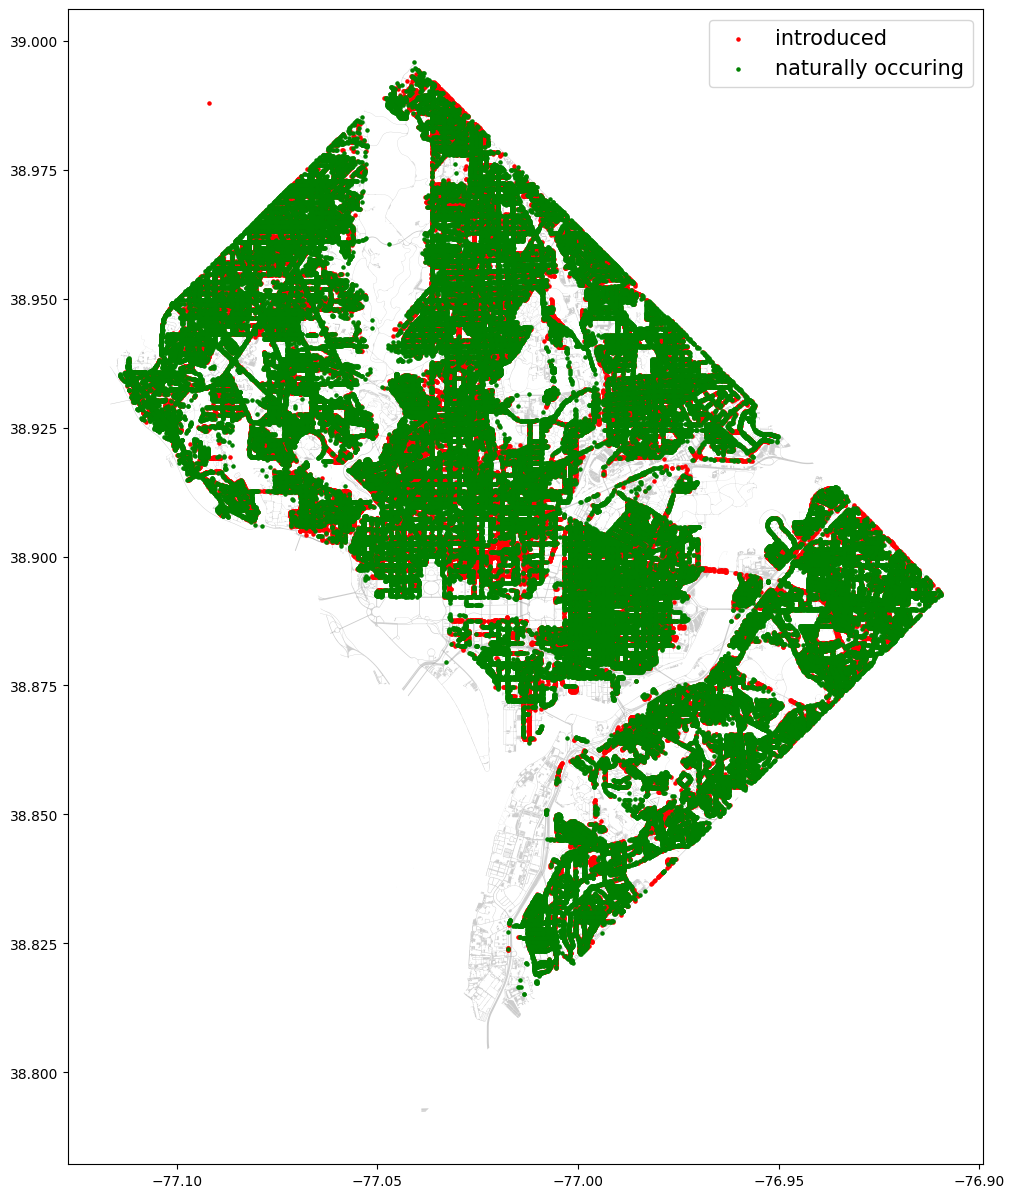

In [ ]:
msize = 5
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[(geo_df['native_introduced'] == 1) & (geo_df['native_naturally_occurring'] == 0)].plot(ax=ax, 
                                       markersize=msize, 
                                       color='red', 
                                    #    marker='o', 
                                       label='introduced')
geo_df[(geo_df['native_introduced'] == 0) & (geo_df['native_naturally_occurring'] == 1)].plot(ax=ax, 
                                       markersize=msize, 
                                       color='g', 
                                    #    marker='^', 
                                       label='naturally occuring')
plt.legend(prop={'size':15})

In [ ]:
geo_df[geo_df['native_introduced'] == 1].all() and geo_df[geo_df['native_naturally_occurring'] == 0].all()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().